# Import Section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Reading Data Set

In [2]:
df = pd.read_csv("iris.data",names=["sepal_length(cm)", "sepal_width(cm)", "petal_length(cm)", "petal_width(cm)",'class'])

In [3]:
arr = df[['sepal_length(cm)','sepal_width(cm)','petal_length(cm)','petal_width(cm)']].values
arr = arr.tolist()

In [4]:
iris_setosa = arr[0:50]

iris_versicolor = arr[50:100]

iris_virginica = arr[100:150]

# iris_setosa = iris_setosa.tolist()
# iris_virginica = iris_virginica.tolist()
# iris_versicolor = iris_versicolor.tolist()
df

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Splitting Data into Training and Testing Sets

In [5]:
setosa_train, setosa_test = iris_setosa[0:30],iris_setosa[30:50]
versicolor_train, versicolor_test = iris_versicolor[0:30], iris_versicolor[30:50]
virginica_train, virginica_test = iris_virginica[0:30], iris_virginica[30:50]


# Mean and Covariance Calculation

In [6]:
mean_setosa = np.mean(setosa_train,axis = 0)
mean_versi = np.mean(versicolor_train,axis = 0)
mean_virginica = np.mean(virginica_train,axis = 0)
# print(mean_setosa)
# print(mean_versi)
# print(mean_virginica)
cov_setosa = np.cov(np.transpose(setosa_train))
cov_versi = np.cov(np.transpose(versicolor_train))
cov_virginica = np.cov(np.transpose(virginica_train))
# print(cov_setosa)
# print(cov_versi)
# print(cov_virginica)

# Mean Calculation

In [7]:
allData = iris_setosa + iris_versicolor + iris_virginica;
a, b, c, d = 0, 0, 0, 0
mean = []
for i in allData:
    a += i[0]
    b += i[1]
    c += i[2]
    d += i[3]
mean.append(a/30)
mean.append(b/30)
mean.append(c/30)
mean.append(d/30)
print(mean)

[29.216666666666676, 15.270000000000005, 18.793333333333347, 5.993333333333337]


# Functions for Distance Calculation

In [8]:
# Euclidean Distance
def Euclidean(p,q):
    d = 0
    for i in range(4):
        d += (q[i] - p[i])**2
    d = math.sqrt(d)
    return d


In [9]:
# City Block Distance
def CityBlock(p,q):
    d = 0
    for i in range(4):
        d += abs(q[i] - p[i])
    return d


In [10]:
# Chess Board Distance
def ChessBoard(p,q):
    d = 0
    for i in range(4):
        temp = abs(q[i] - p[i])
        if(temp > d):
            d = temp
    return d

In [11]:
# Mahalanobis Distance
def Mahalanobis(p,q,cov):
    d = np.subtract(p,q)
    d =round(np.dot((np.dot(d,np.linalg.inv(cov))),np.transpose(d)))
    return d


In [12]:
# Correlation Distance
def Correlation(p,q):
    s1 = 0
    normA = 0
    normB = 0
    for i in range(4):
        s1 += ((p[i]-mean[i]))*((q[i]-mean[i]))
    for j in range(4):
        normA += ((p[i] - mean[i])**2)
        normB += ((q[i] - mean[i])**2)
    norm = normA * normB
    norm = math.sqrt(norm)
    d = (1 - (s1 / norm))
    return d

In [13]:
# Cosine Distance
def Cosine(p,q):
    normA = 0
    normB = 0
    for i in range(4):
        normA += p[i]**2
        normB += q[i]**2
    normA = math.sqrt(normA)
    normB = math.sqrt(normB)
    s = 0
    for i in range(4):
        s += p[i]*q[i]
    d = 1 - (s / (normA * normB))
    return d

In [14]:
# Bray-Curtis Distance
def BrayCurtis(p,q):
    s1 = 0
    s2 = 0
    for i in range(4):
        s1 += np.abs(p[i] - q[i])
        s2 += np.abs(p[i] + q[i])
    d = s1 / s2
    return d


In [15]:
# Canberra Distance
def Canberra(p,q):
    d = 0
    s1 = 0
    s2 = 0
    for i in range(4):
        s1 = np.abs(p[i] - q[i])
        s2 = np.abs(p[i] + q[i])
        d += (s1 / s2)
    return d

In [16]:
test_features = setosa_test + versicolor_test + virginica_test
train_features = setosa_train + versicolor_train + virginica_train
label = []
for i in range(len(setosa_test)):
    label.append("Iris-Setosa")
for i in range(len(versicolor_test)):
    label.append("Iris-Versicolor")
for i in range(len(virginica_test)):
    label.append("Iris-Virginica")
# print(test_features)

In [17]:
misErrRt = []
meanError = []
meanSqrErr = []
meanAbsErr = []

# Distance Calculation

In [18]:
# Using Euclidean Distance
result = []
for i in test_features:
    setosa_dis = Euclidean(i, mean_setosa)
    virgi_dis = Euclidean(i, mean_virginica)
    versi_dis = Euclidean(i, mean_versi)
    if(setosa_dis < virgi_dis and setosa_dis < versi_dis):
        minDis = setosa_dis
        result.append("Iris-Setosa")
    elif(virgi_dis < setosa_dis and virgi_dis < versi_dis):
        minDis = virgi_dis
        result.append("Iris-Virginica")
    elif(versi_dis < setosa_dis and versi_dis < virgi_dis):
        minDis = versi_dis
        result.append("Iris-Versicolor")

error = 0
errDistance = 0
errDisSqr = 0
errAbsolute = 0
# print(result)
for i in range(60):
    if(label[i] != result[i]):
        error += 1
        errDistance += minDis
        errDisSqr += minDis ** 2
        errAbsolute += abs(minDis)

misErrRt.append(error / 60)
meanError.append(float(errDistance) / float(error))
meanSqrErr.append(float(errDisSqr) / float(error))
meanAbsErr.append(float(errAbsolute) / float(error))


In [19]:
# Using CityBloack Distance
result = []
for i in test_features:
    setosa_dis = CityBlock(i, mean_setosa)
    virgi_dis = CityBlock(i, mean_virginica)
    versi_dis = CityBlock(i, mean_versi)
    if(setosa_dis < virgi_dis and setosa_dis < versi_dis):
        minDis = setosa_dis
        result.append("Iris-Setosa")
    elif(virgi_dis < setosa_dis and virgi_dis < versi_dis):
        minDis = virgi_dis
        result.append("Iris-Virginica")
    elif(versi_dis < setosa_dis and versi_dis < virgi_dis):
        minDis = versi_dis
        result.append("Iris-Versicolor")

error = 0
errDistance = 0
errDisSqr = 0
errAbsolute = 0

for i in range(60):
    if(label[i] != result[i]):
        error += 1
        errDistance += minDis
        errDisSqr += minDis ** 2
        errAbsolute += abs(minDis)

misErrRt.append(error / 60)
meanError.append(float(errDistance) / float(error))
meanSqrErr.append(float(errDisSqr) / float(error))
meanAbsErr.append(float(errAbsolute) / float(error))

In [20]:
# Using Chess Board Distance
result = []
for i in test_features:
    setosa_dis = ChessBoard(i, mean_setosa)
    virgi_dis = ChessBoard(i, mean_virginica)
    versi_dis = ChessBoard(i, mean_versi)
    if(setosa_dis < virgi_dis and setosa_dis < versi_dis):
        minDis = setosa_dis
        result.append("Iris-Setosa")
    elif(virgi_dis < setosa_dis and virgi_dis < versi_dis):
        minDis = virgi_dis
        result.append("Iris-Virginica")
    elif(versi_dis < setosa_dis and versi_dis < virgi_dis):
        minDis = versi_dis
        result.append("Iris-Versicolor")

error = 0
errDistance = 0
errDisSqr = 0
errAbsolute = 0

for i in range(60):
    if(label[i] != result[i]):
        error += 1
        errDistance += minDis
        errDisSqr += minDis ** 2
        errAbsolute += abs(minDis)

misErrRt.append(error / 60)
meanError.append(float(errDistance) / float(error))
meanSqrErr.append(float(errDisSqr) / float(error))
meanAbsErr.append(float(errAbsolute) / float(error))

In [21]:
# Using Mahalanobis Distance
result = []
for i in test_features:
    setosa_dis = Mahalanobis(i, mean_setosa, cov_setosa)
    virgi_dis = Mahalanobis(i, mean_virginica, cov_virginica)
    versi_dis = Mahalanobis(i, mean_versi, cov_versi)
    if(setosa_dis < virgi_dis and setosa_dis < versi_dis):
        minDis = setosa_dis
        result.append("Iris-Setosa")
    elif(virgi_dis < setosa_dis and virgi_dis < versi_dis):
        minDis = virgi_dis
        result.append("Iris-Virginica")
    elif(versi_dis < setosa_dis and versi_dis < virgi_dis):
        minDis = versi_dis
        result.append("Iris-Versicolor")

error = 0
errDistance = 0
errDisSqr = 0
errAbsolute = 0

for i in range(60):
    if(label[i] != result[i]):
        error += 1
        errDistance += minDis
        errDisSqr += minDis ** 2
        errAbsolute += abs(minDis)

misErrRt.append(error / 60)
meanError.append(float(errDistance) / float(error))
meanSqrErr.append(float(errDisSqr) / float(error))
meanAbsErr.append(float(errAbsolute) / float(error))

In [22]:
# Using Correlation Distance
result = []
for i in test_features:
    setosa_dis = Correlation(i, mean_setosa)
    virgi_dis = Correlation(i, mean_virginica)
    versi_dis = Correlation(i, mean_versi)
    #print(setosa_dis, virgi_dis, versi_dis)
    if(setosa_dis < virgi_dis and setosa_dis < versi_dis):
        minDis = setosa_dis
        result.append("Iris-Setosa")
    elif(virgi_dis < setosa_dis and virgi_dis < versi_dis):
        minDis = virgi_dis
        result.append("Iris-Virginica")
    elif(versi_dis < setosa_dis and versi_dis < virgi_dis):
        minDis = versi_dis
        result.append("Iris-Versicolor")

error = 0
errDistance = 0
errDisSqr = 0
errAbsolute = 0

for i in range(60):
    if(label[i] != result[i]):
        error += 1
        errDistance += minDis
        errDisSqr += minDis ** 2
        errAbsolute += abs(minDis)

misErrRt.append(error / 60)
meanError.append(float(errDistance) / float(error))
meanSqrErr.append(float(errDisSqr) / float(error))
meanAbsErr.append(float(errAbsolute) / float(error))

In [23]:
# Using Cosine Distance
result = []
for i in test_features:
    setosa_dis = Cosine(i, mean_setosa)
    virgi_dis = Cosine(i, mean_virginica)
    versi_dis = Cosine(i, mean_versi)
    if(setosa_dis < virgi_dis and setosa_dis < versi_dis):
        minDis = setosa_dis
        result.append("Iris-Setosa")
    elif(virgi_dis < setosa_dis and virgi_dis < versi_dis):
        minDis = virgi_dis
        result.append("Iris-Virginica")
    elif(versi_dis < setosa_dis and versi_dis < virgi_dis):
        minDis = versi_dis
        result.append("Iris-Versicolor")

error = 0
errDistance = 0
errDisSqr = 0
errAbsolute = 0

for i in range(60):
    if(label[i] != result[i]):
        error += 1
        errDistance += minDis
        errDisSqr += minDis ** 2
        errAbsolute += abs(minDis)

misErrRt.append(error / 60)
meanError.append(float(errDistance) / float(error))
meanSqrErr.append(float(errDisSqr) / float(error))
meanAbsErr.append(float(errAbsolute) / float(error))

In [24]:
# Using Bray-Curtis Distance
result = []
for i in test_features:
    setosa_dis = BrayCurtis(i, mean_setosa)
    virgi_dis = BrayCurtis(i, mean_virginica)
    versi_dis = BrayCurtis(i, mean_versi)
    if(setosa_dis < virgi_dis and setosa_dis < versi_dis):
        minDis = setosa_dis
        result.append("Iris-Setosa")
    elif(virgi_dis < setosa_dis and virgi_dis < versi_dis):
        minDis = virgi_dis
        result.append("Iris-Virginica")
    elif(versi_dis < setosa_dis and versi_dis < virgi_dis):
        minDis = versi_dis
        result.append("Iris-Versicolor")

error = 0
errDistance = 0
errDisSqr = 0
errAbsolute = 0

for i in range(60):
    if(label[i] != result[i]):
        error += 1
        errDistance += minDis
        errDisSqr += minDis ** 2
        errAbsolute += abs(minDis)

misErrRt.append(error / 60)
meanError.append(float(errDistance) / float(error))
meanSqrErr.append(float(errDisSqr) / float(error))
meanAbsErr.append(float(errAbsolute) / float(error))

In [25]:
# Using Canberra Distance
result = []
for i in test_features:
    setosa_dis = Canberra(i, mean_setosa)
    virgi_dis = Canberra(i, mean_virginica)
    versi_dis = Canberra(i, mean_versi)
    if(setosa_dis < virgi_dis and setosa_dis < versi_dis):
        minDis = setosa_dis
        result.append("Iris-Setosa")
    elif(virgi_dis < setosa_dis and virgi_dis < versi_dis):
        minDis = virgi_dis
        result.append("Iris-Virginica")
    elif(versi_dis < setosa_dis and versi_dis < virgi_dis):
        minDis = versi_dis
        result.append("Iris-Versicolor")

error = 0
errDistance = 0
errDisSqr = 0
errAbsolute = 0

for i in range(60):
    if(label[i] != result[i]):
        error += 1
        errDistance += minDis
        errDisSqr += minDis ** 2
        errAbsolute += abs(minDis)

misErrRt.append(error / 60)
meanError.append(float(errDistance) / float(error))
meanSqrErr.append(float(errDisSqr) / float(error))
meanAbsErr.append(float(errAbsolute) / float(error))

# Scatter Plots (Iris-Setosa vs Iris-Versicolor vs Iris-Virginica

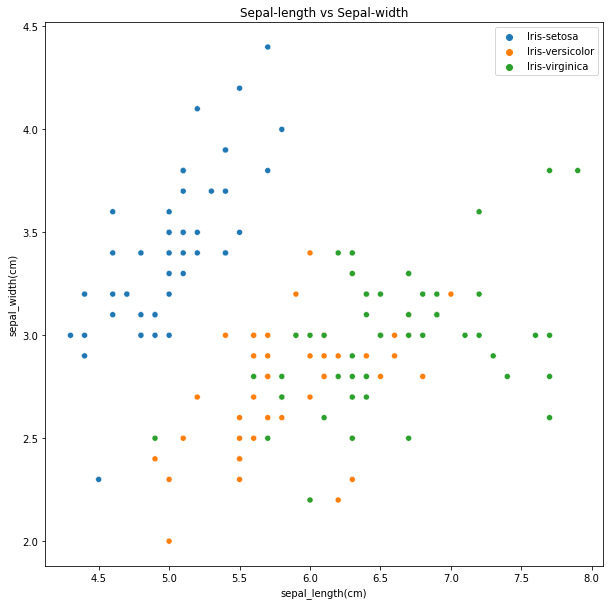

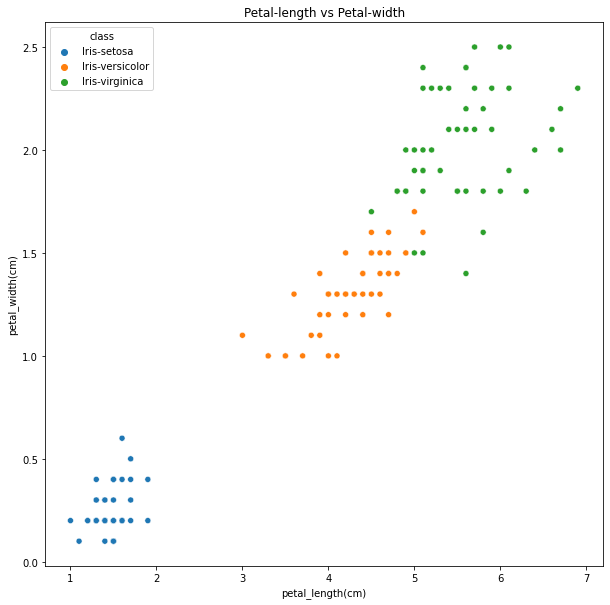

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df["sepal_length(cm)"], y = df["sepal_width(cm)"], hue = df["class"])
plt.legend()
plt.title("Sepal-length vs Sepal-width")
plt.show()

plt.figure(figsize=(10,10))
sns.scatterplot(x = df["petal_length(cm)"], y = df["petal_width(cm)"], hue = df["class"])
plt.title("Petal-length vs Petal-width")
plt.show()

# Plots for comparison between Classifers

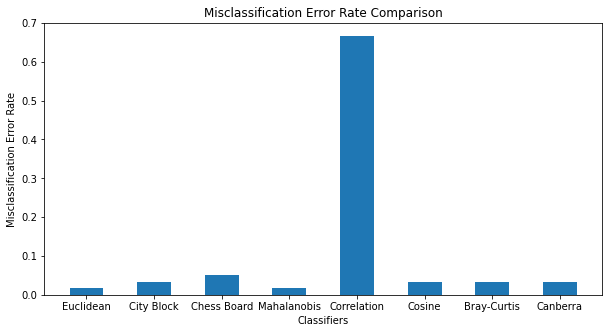

In [27]:
classifier = ['Euclidean', 'City Block', 'Chess Board', 'Mahalanobis', 'Correlation', 'Cosine', 'Bray-Curtis', 'Canberra']

fig = plt.figure(figsize = (10,5))
plt.bar(classifier, misErrRt, width = 0.5)
plt.title("Misclassification Error Rate Comparison")
plt.xlabel("Classifiers")
plt.ylabel("Misclassification Error Rate")
plt.show()

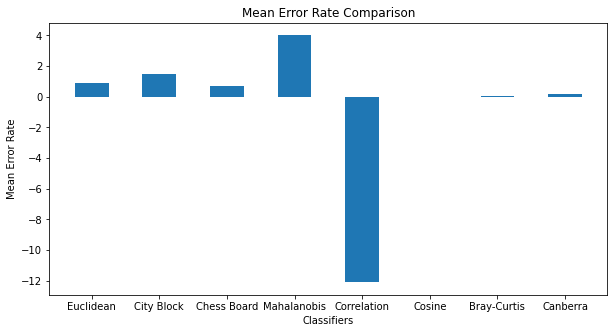

In [28]:
classifier = ['Euclidean', 'City Block', 'Chess Board', 'Mahalanobis', 'Correlation', 'Cosine', 'Bray-Curtis', 'Canberra']

fig = plt.figure(figsize = (10,5))
plt.bar(classifier, meanError, width = 0.5)
plt.title("Mean Error Rate Comparison")
plt.xlabel("Classifiers")
plt.ylabel("Mean Error Rate")
plt.show()

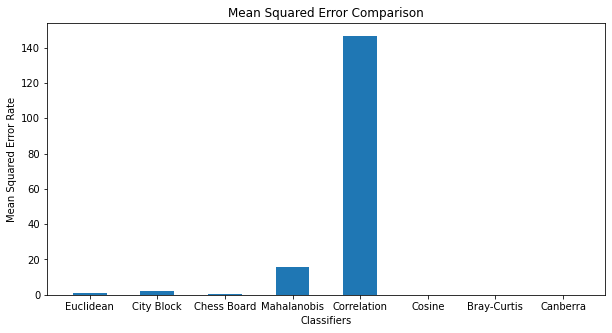

In [29]:
classifier = ['Euclidean', 'City Block', 'Chess Board', 'Mahalanobis', 'Correlation', 'Cosine', 'Bray-Curtis', 'Canberra']

fig = plt.figure(figsize = (10,5))
plt.bar(classifier, meanSqrErr, width = 0.5)
plt.title("Mean Squared Error Comparison")
plt.xlabel("Classifiers")
plt.ylabel("Mean Squared Error Rate")
plt.show()


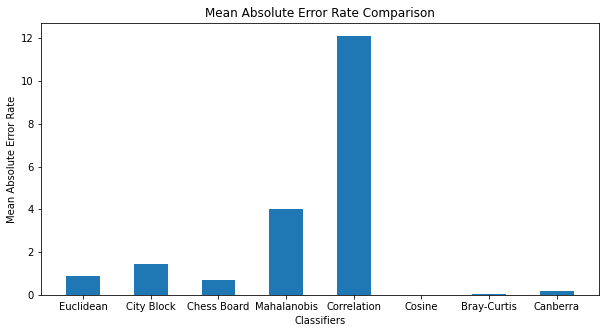

In [30]:
classifier = ['Euclidean', 'City Block', 'Chess Board', 'Mahalanobis', 'Correlation', 'Cosine', 'Bray-Curtis', 'Canberra']

fig = plt.figure(figsize = (10,5))
plt.bar(classifier, meanAbsErr, width = 0.5)
plt.title("Mean Absolute Error Rate Comparison")
plt.xlabel("Classifiers")
plt.ylabel("Mean Absolute Error Rate")
plt.show()